## Random Problem Generator for Pole Locations

### Overview

This notebook generates random practice problems to help students learn the connections between transfer functions, poles, and step responses.  Three different types of problems can be generated.  In [Option 1](#Option-1), the student is shown the transfer functions and asked to find everything else (pole locations, $\zeta$, and $\omega_n$, and so on) and then sketch the step response.  In [Option 2](#Option-2), the student is shown a plot of the pole locations without being given the transfer functions.  They cannot exactly calculate the settling time and so on, but they can sketch the step responses with respect to one another.  In [Option 3](#Option-3), the step responses can be shown without showing the TFs.  The student can then estimate $\zeta$ and $\omega_n$ as well as sketch the pole locations.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import control
from numpy import sin, cos, tan, pi
from control import TransferFunction as TF
import random_bode_generator as rbg

In [6]:
from numpy import random

In [7]:
random.rand()

0.6531409965484715

In [8]:
def random_so_tf(p_unstable=0.1, p_real=0.1):
    z = random.rand()*(1 + p_real)
    # unstable sometimes:
    if random.rand() < p_unstable:
        z *= -1
    wn = 10*pi*random.rand()
    G = TF(wn**2, [1,2*z*wn,wn**2])
    return G

In [9]:
def check_zeta_and_wn(G):
    p = G.poles()
    wn = np.abs(p[0])
    z = -np.real(p[0])/wn
    return z, wn

In [10]:
def get_specs(G):
    z, wn = check_zeta_and_wn(G)
    wd = wn*np.sqrt(1-z**2)
    ts = 3.91/(z*wn)
    Mp = np.exp(-z*np.pi/(np.sqrt(1-z**2)))
    if z < 0:
        # unstable
        line1 = "zeta = %0.3g, unstable!" % z
        if z < -1:
            # unstable real pole
            line2 = "unstable real pole"
            line3 = "exponential growth without oscillations"
        else:
            # unstable underdamped pole
            line2 = "unstable complex pole"
            line3 = "growing oscillations"
    else:
        line1 = "zeta = %0.3g, overshoot = %0.4g" % (z, Mp)
        line2 = "wd = %0.4g, wn = %0.4g" % (wd, wn)
        line3 = "ts = %0.4g" % ts
    return [line1, line2, line3]

In [11]:
def find_min_wn(G_list):
    mymin = 10000
    for G in G_list:
        poles = G.poles()
        wn = np.abs(poles[0])
        if wn < mymin:
            mymin = wn
    return mymin

In [18]:
def plot_step_responses(G_list, t=None, start_ind=1, stop_t=None):
    line_types = ['-','--','-.','--','-']
    if t is None:
        if stop_t is None:
            wn = find_min_wn(G_list)
            T = 2*np.pi/wn
            stop_t = 3*T
        t = np.arange(0,stop_t,0.001)
    plt.figure()

    for n, G in enumerate(G_list):
        to, y_n = control.step_response(G, t)
        j = n + start_ind
        mylabel = "$G_{%i}$" % j
        lt = line_types[n]
        plt.plot(t, y_n, lt, label=mylabel)

    plt.legend()
    plt.xlabel("Time (sec.)")
    plt.ylabel("Step Response")

In [19]:
def plot_pole_locations(G_list, start_ind=1):
    mysymbols =['^','o','s','h','D','X']
    plt.figure()

    N = len(G_list)
    n_vect = np.arange(N)

    mymax = 0
    
    for n, G, sym in zip(n_vect, G_list, mysymbols):
        poles = G.poles()
        j = n + start_ind
        mylabel = "$G_{%i}$" % j
        plt.plot(np.real(poles), np.imag(poles), sym, label=mylabel)
        wn = np.abs(poles[0])
        if wn > mymax:
            mymax = wn

    mymax *= 1.1
    plt.legend()
    plt.xlabel("Real")
    plt.ylabel("Imag")
    myx = [-mymax,mymax/3]
    myy = [-mymax,mymax]
    plt.xlim(myx)
    plt.ylim(myy)
    plt.plot(myx,[0,0],'k:', label=None)
    plt.plot([0,0], myy,'k:', label=None)

## Generate a practice problem:

### Option 1

Show the transfer functions and generate everything else:

In [20]:
G1 = random_so_tf()
G1

TransferFunction(array([858.77130609]), array([  1.        ,  35.55936599, 858.77130609]))

In [21]:
G2 = random_so_tf()
G2

TransferFunction(array([501.42814437]), array([  1.        ,  27.51243276, 501.42814437]))

### Problem Statement

For the two transfer functions above:

- find the pole locations and plot them on a real vs. imaginary axis
- find $\zeta$, $\omega_n$, and $\omega_d$ from the pole locations
- calculate the time domain specs
- sketch the step responses with respect to one another

## Check Your Answer:

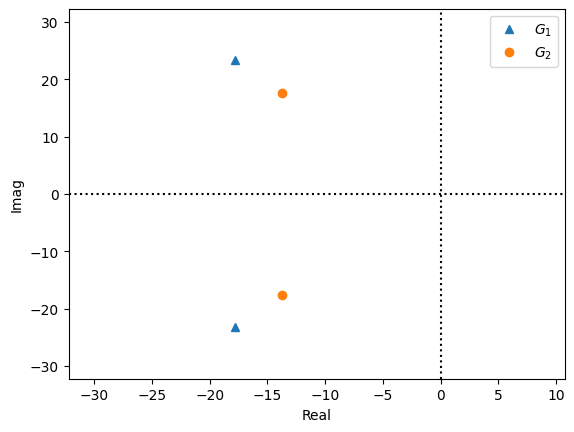

In [22]:
plot_pole_locations([G1,G2])

In [23]:
check_zeta_and_wn(G1)

(np.float64(0.6067157244891368), np.float64(29.30480005203145))

In [24]:
check_zeta_and_wn(G2)

(np.float64(0.6143199866997475), np.float64(22.392591282947464))

In [25]:
get_specs(G1)

['zeta = 0.607, overshoot = 0.09092', 'wd = 23.29, wn = 29.3', 'ts = 0.2199']

In [26]:
get_specs(G2)

['zeta = 0.614, overshoot = 0.08665', 'wd = 17.67, wn = 22.39', 'ts = 0.2842']

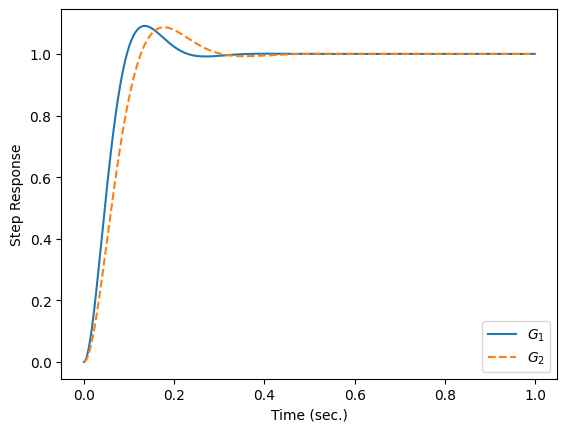

In [27]:
plot_step_responses([G1,G2],stop_t=1)

### Option 2

Show the pole locations without showing the transfer functions.  Generate everything else from the pole locations plot.

- Note: with this option, you can only compare the time domain specs relative to one another
    - you cannot calculate the settling time, overshoot, or rise time without estimating $\zeta$ and $\omega_n$ first and that is not the point

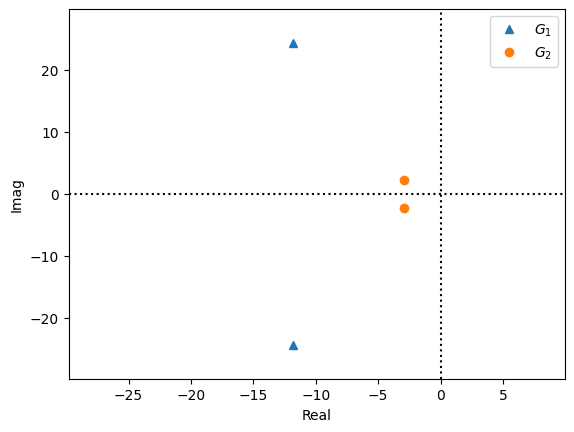

In [28]:
G1 = random_so_tf()
G2 = random_so_tf()
plot_pole_locations([G1,G2])

### Check your answer

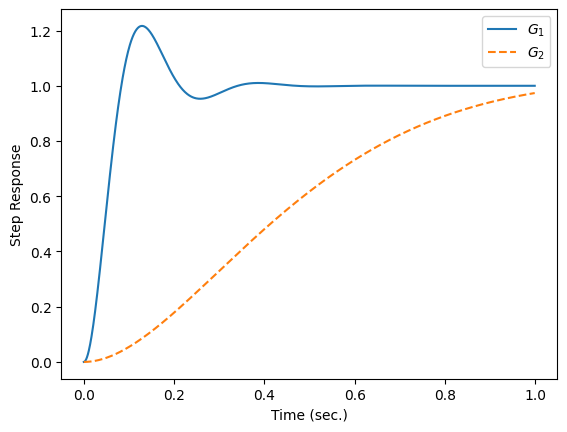

In [29]:
plot_step_responses([G1,G2],stop_t=1)

## Option 3

Show the step responses without showing the transfer functions

- estimate $\zeta$ and $\omega_n$ from the step responses
- plot the pole locations with respect to one another based on $\zeta$, $\omega_n$ and/or the time domain specifications (settling time, rise time, peak time, ...)

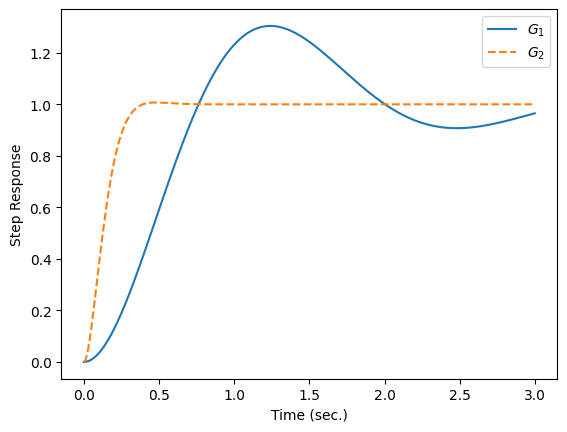

In [30]:
G1 = random_so_tf()
G2 = random_so_tf()
plot_step_responses([G1,G2],stop_t=3)

### Check your answers

In [31]:
check_zeta_and_wn(G1)

(np.float64(0.3541133064379916), np.float64(2.708509101402946))

In [32]:
check_zeta_and_wn(G2)

(np.float64(0.8437086482741235), np.float64(12.207108591465445))

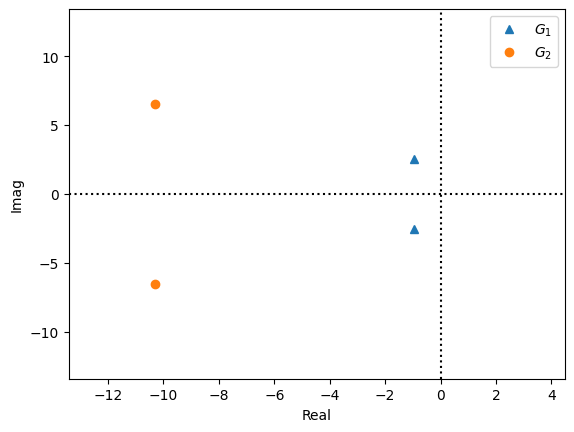

In [33]:
plot_pole_locations([G1,G2])